In [1]:
import logging

import numpy as np
import pandas as pd

In [2]:
logging.getLogger("google").setLevel("DEBUG")
logging.getLogger("pandas_gbq").setLevel("DEBUG")
logging.basicConfig()

In [3]:
query = """
SELECT 
    a.cell_types,
    b.gene,
    b.expression
FROM `keen-dispatch-316219.gse115978_tirosh.cell_annotations` a
join `keen-dispatch-316219.gse115978_tirosh.tpm` b TABLESAMPLE SYSTEM (.001 PERCENT)
on a.cells = b.single_cell
where a.cell_types != '?'
"""

tpm_with_cell_type = pd.read_gbq(query)

DEBUG:google.auth._default:Checking None for explicit credentials as part of auth process...
DEBUG:google.auth._default:Checking Cloud SDK credentials as part of auth process...
DEBUG:google.auth._default:Cloud SDK credentials not found on disk; not using them
DEBUG:google.auth._default:Checking for App Engine runtime as part of auth process...
DEBUG:google.auth._default:No App Engine library was found so cannot authentication via App Engine Identity Credentials.
DEBUG:google.auth.transport._http_client:Making request: GET http://169.254.169.254
DEBUG:google.auth.transport._http_client:Making request: GET http://metadata.google.internal/computeMetadata/v1/project/project-id
DEBUG:google.auth.transport.requests:Making request: GET http://metadata.google.internal/computeMetadata/v1/instance/service-accounts/default/?recursive=true
DEBUG:google.auth.transport.requests:Making request: GET http://metadata.google.internal/computeMetadata/v1/instance/service-accounts/72003108821-compute@devel

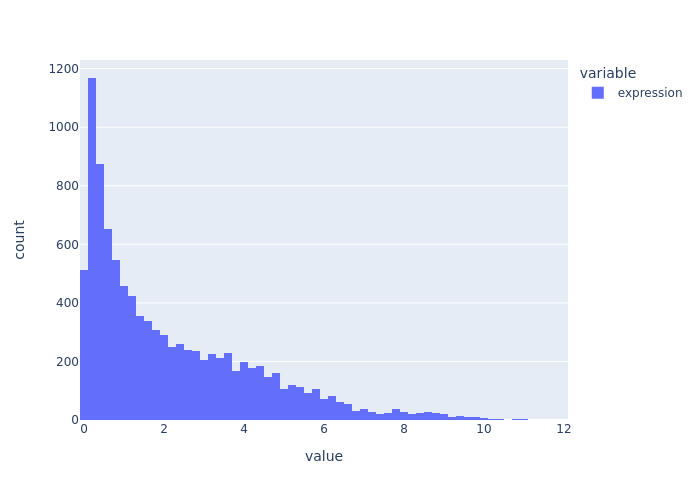

In [4]:
import plotly.io

plotly.io.renderers.default = "jupyterlab+png"

import plotly.express as px

fig = px.histogram(
    tpm_with_cell_type.query("expression > 0").sample(10000)["expression"]
)

fig.show()

In [5]:
tpm_with_cell_type

,cell_types,gene,expression
0,NK,AK8,0.0
1,NK,AK8,0.0
2,NK,AK8,0.0
3,NK,AK8,0.0
4,NK,AK8,0.0
...,...,...,...
3829157,Macrophage,LOC100505912,0.0
3829158,Macrophage,LOC100505912,0.0
3829159,Macrophage,LOC100505912,0.0
3829160,Macrophage,LOC100505912,0.0


In [6]:
tpm_with_cell_type.pivot(index="gene", columns="cell_types", values="expression")

ValueError: Index contains duplicate entries, cannot reshape